In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from decimal import Decimal

# Study data files
cleaned_data_path = "data/data_cleaning.csv"
stacked_data_path = "Data/data_cleaning_stacked.csv"

# Read the mouse data and the study results
movie_clean = pd.read_csv(cleaned_data_path, index_col=0)
movie_stacked = pd.read_csv(stacked_data_path, index_col=0)


In [2]:
# Bin data by decade
decade_bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

### Cleaned Data

In [3]:
# Display the data table for cleaned data
movie_clean.head()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$128,831,540.56"
1,tt0017136,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$17,839,651.48"
2,tt0017354,The Sea Beast,1926,1926-01-15,"Action, Adventure, Fantasy",136,USA,English,Millard Webb,"Herman Melville, Bess Meredyth",Warner Bros.,"John Barrymore, Dolores Costello, George O'Har...",6.5,126,"$814,000.00","$11,548,084.63"
3,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,"$19,181.00","$316,873.91"
4,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,"$163,577.00","$2,955,059.69"


### Stacked Data Analysis

In [4]:
# Remove leading space in genre
movie_stacked['Genre'] = movie_stacked['Genre'].str.lstrip()
# Display the data table for stacked data
movie_stacked.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Drama,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
1,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Romance,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
2,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,War,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
3,tt0017136,Metropolis,1927,1927-02-06,Drama,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$18,162,901.79"
4,tt0017136,Metropolis,1927,1927-02-06,Sci-Fi,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$18,162,901.79"


In [5]:
# Cut stacked data by decade
movie_stacked["Decade"] = pd.cut(movie_stacked["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_stacked.head()

# Output file to csv
movie_stacked.to_csv(r'Data\movie_stacked_nc.csv', index=False)

In [6]:
# Group stacked data by decade and count how many records
stacked_decade = movie_stacked.groupby('Decade')
stacked_decade.count()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1930-1939,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1940-1949,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
1950-1959,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
1960-1969,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1970-1979,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
1980-1989,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,3085,3108,3108,3108,3108,3108
1990-1999,4374,4374,4374,4374,4374,4374,4374,4371,4374,4372,4363,4374,4374,4374,4374,4374
2000-2009,5459,5459,5459,5459,5459,5459,5459,5447,5457,5449,5402,5457,5459,5459,5459,5459


In [7]:
# Create a variable for each decade with more than 500 records
decade_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
decade_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
decade_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
decade_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
decade_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

In [266]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_70_groupby = decade_70.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_70_df = pd.DataFrame(decade_70_groupby)
decade_70_df['%'] = ((decade_70_df['Decade'] / decade_70_df['Decade'].sum())*100).round(2).astype(float)


decade_70_df.reset_index()

,Genre,Decade,%
0,Drama,137,23.95
1,Comedy,87,15.21
2,Action,41,7.17
3,Romance,40,6.99
4,Adventure,39,6.82
5,Crime,38,6.64
6,Thriller,38,6.64
7,Mystery,21,3.67
8,Sci-Fi,19,3.32
9,Sport,17,2.97


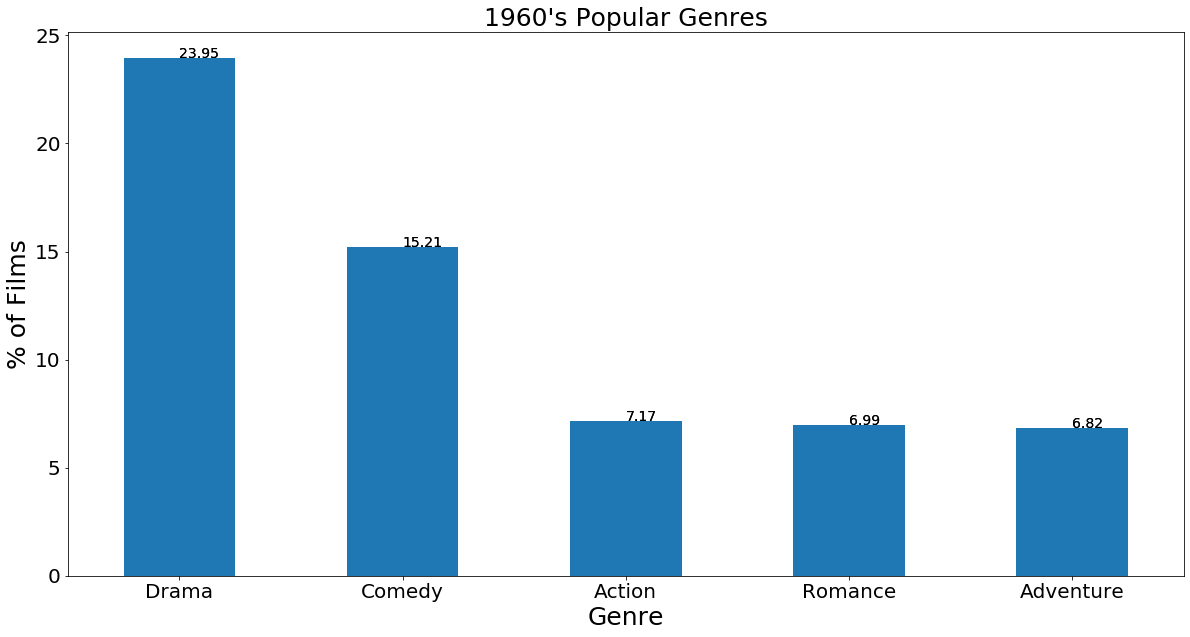

In [267]:
ax = decade_70_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

for col in decade_70_df.columns:
    for id, val in enumerate(decade_70_df['%'].iloc[0:5]):
         ax.text(id, val, str(val), fontsize=14)

# Format chart
plt.title("1960's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()